## Load data

In [1]:
from meningioma_random_forest.data_loading.data_loader import load_train_test_splits
import numpy as np

from pathlib import Path
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import StandardScaler
from meningioma_random_forest.config import BASE_DIR

In [2]:
base_dir = BASE_DIR
radiomics_file_name = "radiomics_features_2023-01-30.csv"

test_dataframe, train_dataframe = load_train_test_splits(
    base_dir, radiomics_file_name, True, test_size=0.2
)

## Visualize feature importance

In [3]:
import nrrd
import nibabel as nib


def convert_nrrd_to_nifti(input: Path):
    path_as_str = str(input.absolute())

    if Path(path_as_str.replace("nrrd", "nii")).exists():
        return Path(path_as_str.replace("nrrd", "nii"))
    _nrrd = nrrd.read(path_as_str)
    data = _nrrd[0]
    header = _nrrd[1]
    img = nib.Nifti1Image(data, np.eye(4))

    nib.save(img, path_as_str.replace("nrrd", "nii"))

    return Path(path_as_str.replace("nrrd", "nii"))

In [101]:
import matplotlib
import matplotlib.pyplot as plt
import radiomics
import SimpleITK as sitk


def make_box_plot(radiomic_feature_name: str, radiomics_train_file: Path):
    df = pd.read_csv(radiomics_train_file, index_col=0)
    values_for_each_label = {}
    for label in df["label"].unique():
        values_for_each_label[label] = df[df["label"] == label][
            radiomic_feature_name
        ].values
    plt.boxplot(list(values_for_each_label.values()))
    plt.title(radiomic_feature_name)
    plt.show()


def make_feature_importance_graphs(
    case_id: str, radiomic_nrrd_name: str, image_name: str, label_name: str
):
    voxel_based_radiomics_dir = (
        BASE_DIR.joinpath("radiomics_voxel_based")
        .joinpath(case_id)
        .joinpath("anat")
        .joinpath("radiomics")
        .joinpath(radiomic_nrrd_name)
    )

    nifti_radiomics = convert_nrrd_to_nifti(voxel_based_radiomics_dir)

    radiomics_values = np.transpose(nib.load(nifti_radiomics).get_fdata(), (2, 1, 0))

    print(image_name)
    print(radiomics_values.shape)

    image, _ = radiomics.imageoperations.resampleImage(
        sitk.ReadImage(
            BASE_DIR.joinpath("radiomics_voxel_based")
            .joinpath(case_id)
            .joinpath("anat")
            .joinpath(image_name)
        ),
        sitk.ReadImage(
            BASE_DIR.joinpath("radiomics_voxel_based")
            .joinpath(case_id)
            .joinpath("anat")
            .joinpath(label_name)
        ),
        resampledPixelSpacing=[1, 1, 1],
        padDistance=0,
    )
    image_array = sitk.GetArrayFromImage(image)
    middle_voxel = radiomics_values.shape[0] // 2

    plt.figure(figsize=(8, 8))
    plt.imshow(image_array[middle_voxel, :, :] / 255.0, cmap="gray")
    # print(image_array[middle_voxel, :, :].shape)
    # plt.show()
    # plt.figure(figsize=(8, 8))
    cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list(
        "my_cmap", ["white", "red"], 256
    )
    cmap1._init()  # create the _lut array, with rgba values
    # create your alpha array and fill the colormap with them.
    # here it is progressive, but you can create whathever you want
    cmap1._lut[:, -1] = np.linspace(0, 1.0, cmap1.N + 3)
    cropped_radiomics_values_array = radiomics_values[middle_voxel, 3:-3, 3:-3]
    plt.imshow(cropped_radiomics_values_array, interpolation="nearest", cmap=cmap1)
    plt.colorbar()
    plt.show()


# feature = "original_glszm_SizeZoneNonUniformityNormalized"
# make_feature_importance_graphs("M1-sub-010", f"Case-1_{feature}.nrrd",
#                                "M1_10_01_t1km_image.nii", "M1_10_01_t1km_image.nii".replace("image", "label"))

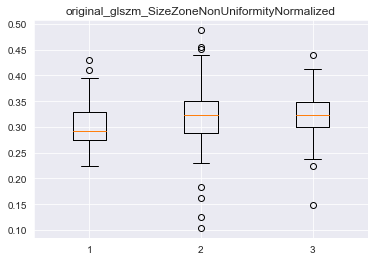


KeyboardInterrupt



In [23]:
radiomics_train_file = BASE_DIR.joinpath("train_radiomics_features_2023-01-30.csv")

for radiomic_name in [
    "original_glszm_SizeZoneNonUniformityNormalized",
    "original_glcm_Imc2",
    "original_glszm_SmallAreaEmphasis",
    "original_glcm_MCC",
    "original_firstorder_Skewness",
    "original_glrlm_LongRunHighGrayLevelEmphasis",
    "original_glcm_Correlation",
    "original_firstorder_Minimum",
    "original_ngtdm_Complexity",
    "original_gldm_LargeDependenceHighGrayLevelEmphasis",
    "original_glcm_Imc2",
    "original_ngtdm_Contrast",
    "original_firstorder_Kurtosis",
    "original_glszm_SizeZoneNonUniformity",
]:
    make_box_plot(radiomic_name, radiomics_train_file)

#  higher means 2 or 3, higher means 2 or 3, low means grade 3, low means grade 3
# ["original_glszm_SizeZoneNonUniformityNormalized", "original_glszm_SmallAreaEmphasis", "original_gldm_LargeDependenceHighGrayLevelEmphasis", "original_firstorder_Kurtosis"]

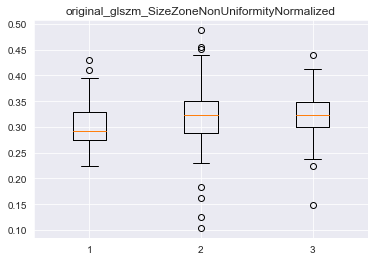

M1_10_01_t1km_image.nii
(52, 57, 47)


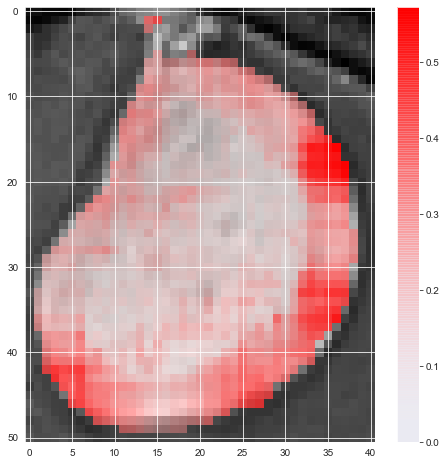

M2_053_01_T1km_image.nii
(75, 78, 74)


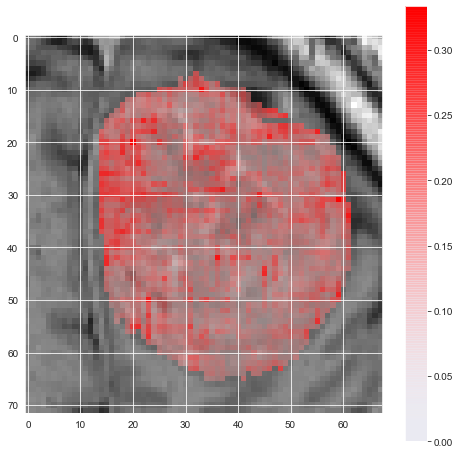

M3_26_01_t1km_image.nii
(48, 43, 38)


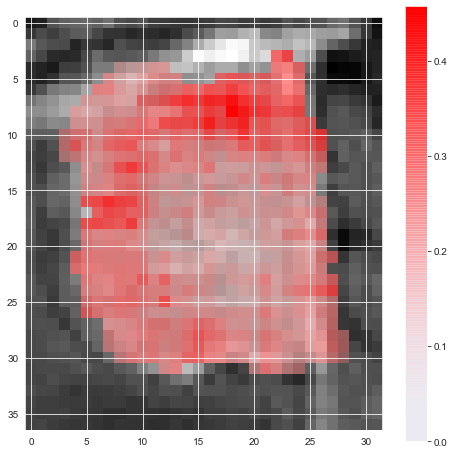

In [102]:
feature = "original_glszm_SizeZoneNonUniformityNormalized"

make_box_plot(feature, BASE_DIR.joinpath("train_radiomics_features_2023-01-30.csv"))
make_feature_importance_graphs(
    "M1-sub-010",
    f"Case-1_{feature}.nrrd",
    "M1_10_01_t1km_image.nii",
    "M1_10_01_t1km_image.nii".replace("image", "label"),
)
make_feature_importance_graphs(
    "M2-sub-053",
    f"Case-1_{feature}.nrrd",
    "M2_053_01_T1km_image.nii",
    "M2_053_01_T1km_image.nii".replace("image", "label"),
)
make_feature_importance_graphs(
    "M3-sub-026",
    f"Case-1_{feature}.nrrd",
    "M3_26_01_t1km_image.nii",
    "M3_26_01_t1km_image.nii".replace("image", "label"),
)

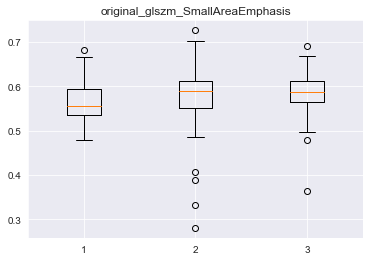

M1_10_01_t1km_image.nii
(52, 57, 47)


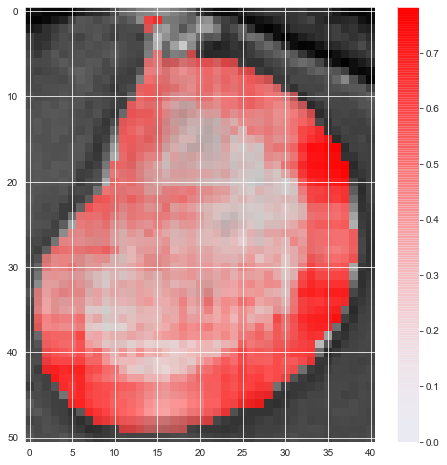

M2_053_01_T1km_image.nii
(75, 78, 74)


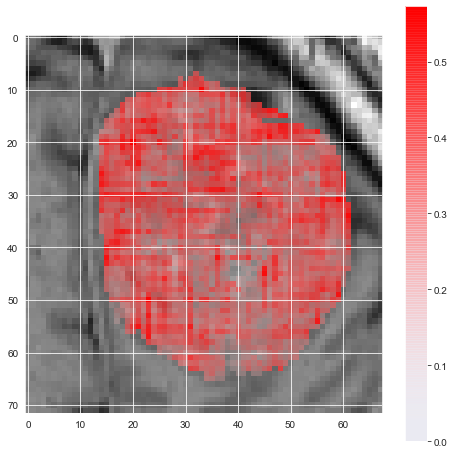

M3_26_01_t1km_image.nii
(48, 43, 38)


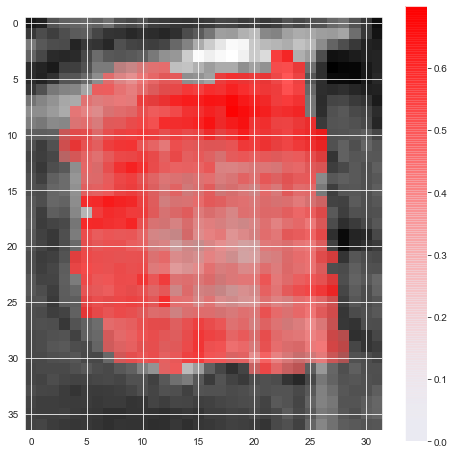

In [103]:
feature = "original_glszm_SmallAreaEmphasis"

make_box_plot(feature, BASE_DIR.joinpath("train_radiomics_features_2023-01-30.csv"))
make_feature_importance_graphs(
    "M1-sub-010",
    f"Case-1_{feature}.nrrd",
    "M1_10_01_t1km_image.nii",
    "M1_10_01_t1km_image.nii".replace("image", "label"),
)
make_feature_importance_graphs(
    "M2-sub-053",
    f"Case-1_{feature}.nrrd",
    "M2_053_01_T1km_image.nii",
    "M2_053_01_T1km_image.nii".replace("image", "label"),
)
make_feature_importance_graphs(
    "M3-sub-026",
    f"Case-1_{feature}.nrrd",
    "M3_26_01_t1km_image.nii",
    "M3_26_01_t1km_image.nii".replace("image", "label"),
)

(120, 256, 256)


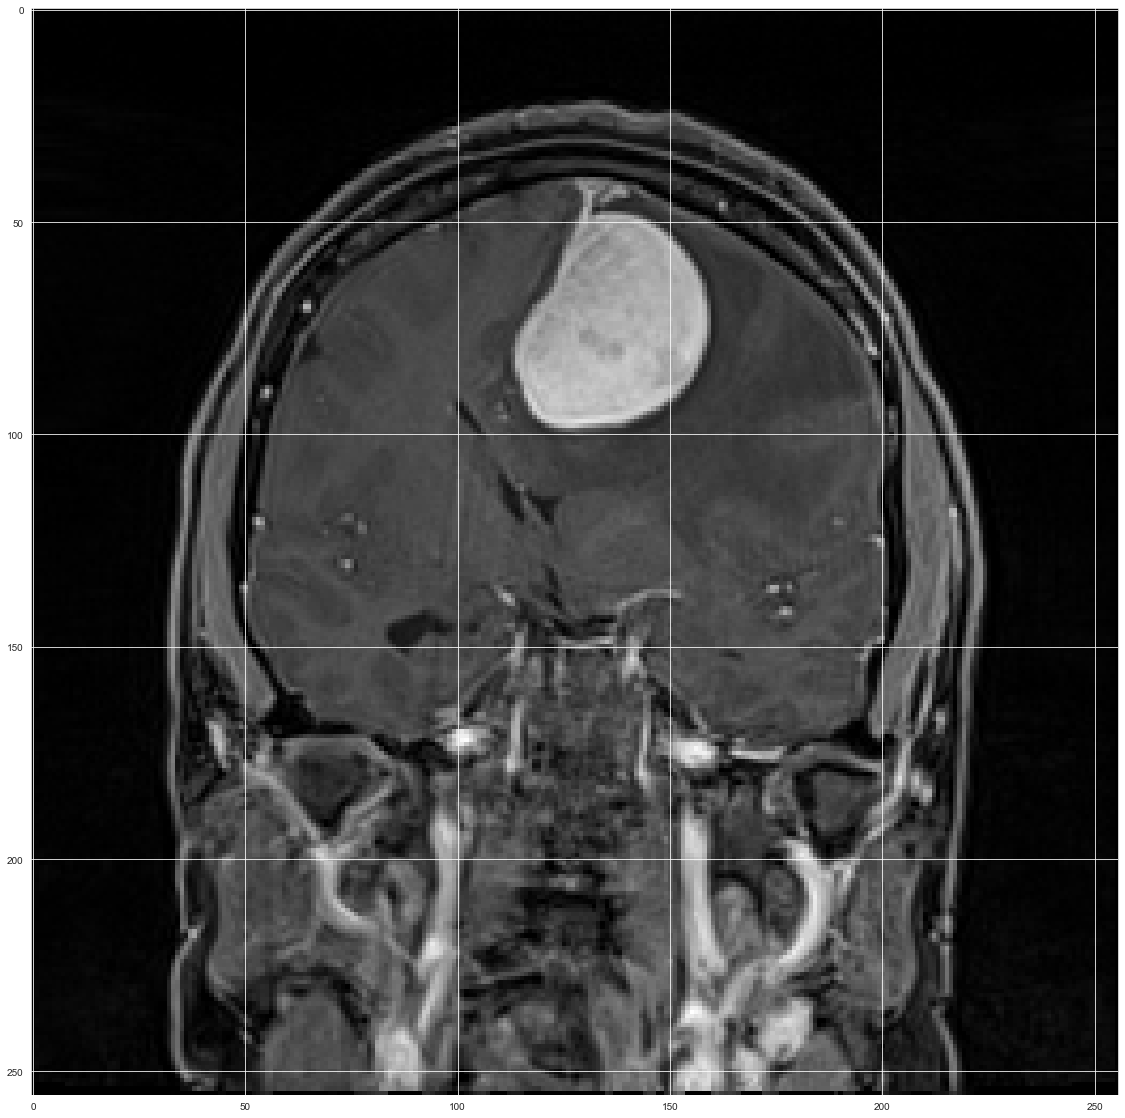

In [8]:
case_id = "M1-sub-010"
image_name = "M1_10_01_t1km_image.nii"

img = sitk.ReadImage(
    BASE_DIR.joinpath("radiomics_voxel_based")
    .joinpath(case_id)
    .joinpath("anat")
    .joinpath(image_name)
)
image_array = sitk.GetArrayFromImage(img)
print(image_array.shape)
plt.figure(figsize=(20, 20))
plt.imshow(image_array[50, :, :], cmap="gray")

## PCA

In [ ]:
from sklearn.decomposition import PCA
from meningioma_random_forest.data_loading.data_loader import get_metadata_columns


def do_scaling(x_dataframe: pd.DataFrame):
    standard_scaler = StandardScaler()
    x_dataframe_scaled = standard_scaler.fit_transform(x_dataframe)
    return pd.DataFrame(
        x_dataframe_scaled, index=x_dataframe.index, columns=x_dataframe.columns
    )


train_dataframe_scaled = do_scaling(
    train_dataframe.drop(get_metadata_columns(train_dataframe), axis=1)
)
pca = PCA(n_components=2)
pca.fit(train_dataframe_scaled)
transformed_values = pca.components_.T

print(f"Explained variance: {pca.explained_variance_ratio_}")

data = []
for group in [1, 2, 3]:
    df_group_idx = list(train_dataframe[train_dataframe["label"] == group].index)
    print(df_group_idx)
    trace = go.Scatter(
        x=transformed_values[df_group_idx, 0],
        y=transformed_values[df_group_idx, 1],
        mode="markers",
        name=group,
    )
    data.append(trace)

# Layout of the plot
layout = go.Layout(title="PCA", xaxis="Component 1", yaxis="Component 2")
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

## Correlation of features with label

In [10]:
import pandas as pd
import plotly.express as px

df = train_dataframe.corr()[["label"]]
# df = pd.concat([df] * 10000, axis=1)
# fig = px.imshow(df)
fig = px.bar(df.iloc[1:])
pyo.plot(fig)

'temp-plot.html'

## Correlations between vars distribution

In [11]:
df = train_dataframe.corr()[["label"]]
fig = px.histogram(np.reshape(df.iloc[1:].to_numpy(), -1))
pyo.plot(fig)

'temp-plot.html'

## Visualize variance explained by PCA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

x_test_dataframe_scaled = do_scaling(train_dataframe)

pca = PCA(n_components=30)
pca.fit(x_test_dataframe_scaled)
sns.set(style="whitegrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
display(plt.show())
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df["Cumulative Variance Ratio"] = cvr
pca_df["Explained Variance Ratio"] = evr
display(pca_df.head(10))

ValueError: could not convert string to float: '/home/cir/lsobocinski/data/meningioma/nifti/M1-sub-049/anat/M1_49_01_t1km_image.nii'

## Features heatmap

In [ ]:
from meningioma_random_forest.data_loading.data_loader import get_metadata_columns
from meningioma_random_forest.data_analysis.visualize_random_forest import plot_features_heatmap

plot_features_heatmap(
    train_dataframe.drop(get_metadata_columns(train_dataframe), axis=1)
)